<a href="https://colab.research.google.com/github/maxriosg/TelecomX/blob/main/Telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

# 1. URL cruda del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# 2. Realizar la petición GET para obtener los datos
response = requests.get(url)
response.raise_for_status()  # Verifica que la petición fue exitosa

# 3. Cargar los datos JSON en Python
data = response.json()

# 4. Convertir el JSON a un DataFrame de Pandas
df = pd.DataFrame(data)

# 5. Mostrar las primeras filas para verificar que se cargaron correctamente
print(df.head())
print("\nDimensiones del DataFrame:", df.shape)
print("\nColumnas disponibles:", df.columns.tolist())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
# Inspección básica del DataFrame
print("Columnas y tipos de datos:\n")
print(df.dtypes)

print("\nResumen de datos (valores únicos, nulos, etc.):\n")
print(df.describe(include='all').T)


Columnas y tipos de datos:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Resumen de datos (valores únicos, nulos, etc.):

           count unique                                                top  \
customerID  7267   7267                                         9995-HOTOH   
Churn       7267      3                                                 No   
customer    7267    891  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
phone       7267      3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
internet    7267    129  {'InternetService': 'No', 'OnlineSecurity': 'N...   
account     7267   6931  {'Contract': 'Month-to-month', 'PaperlessBilli...   

            freq  
customerID     1  
Churn       5174  
customer     223  
phone       3495  
internet    1581  
account        6  


In [4]:
# Ver cuántos valores nulos hay por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

Valores nulos por columna:

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [8]:
for col in ['customer', 'phone', 'internet', 'account']:
    print(f"{col}: {type(df[col].iloc[0])}")

customer: <class 'dict'>
phone: <class 'dict'>
internet: <class 'dict'>
account: <class 'dict'>


In [9]:
for col in ['customer', 'phone', 'internet', 'account']:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

In [10]:
# Buscar duplicados y eliminarlos
print(f"Duplicados antes: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Filas luego de eliminar duplicados: {len(df)}")

Duplicados antes: 0
Filas luego de eliminar duplicados: 7267


In [11]:
from pandas import json_normalize

In [14]:
columnas_dict = ['customer', 'phone', 'internet', 'account']

In [15]:
for col in columnas_dict:
    print(f"Desanidando columna: {col}")

Desanidando columna: customer
Desanidando columna: phone
Desanidando columna: internet
Desanidando columna: account


In [16]:
df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith("{") else x)

In [17]:
columnas_expandidas = json_normalize(df[col])

In [19]:
# Renombrar las columnas resultantes para que incluyan el nombre original como prefijo
columnas_expandidas.columns = [f"{col}_{subcol}" for subcol in columnas_expandidas.columns]

In [20]:
# Agregar las nuevas columnas al DataFrame
df[columnas_expandidas.columns] = columnas_expandidas

In [21]:
 # Agregar las nuevas columnas al DataFrame
df[columnas_expandidas.columns] = columnas_expandidas

In [22]:
# Eliminar la columna original anidada
df.drop(columns=[col], inplace=True)

In [23]:
print("Columnas disponibles después de expandir:")
print(df.columns.tolist())

Columnas disponibles después de expandir:
['customerID', 'Churn', 'phone', 'internet', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [24]:
print("\nPrimeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
   customerID Churn                                            phone  \
0  0002-ORFBO    No   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  0003-MKNFE    No  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2  0004-TLHLJ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3  0011-IGKFF   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4  0013-EXCHZ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  gender  SeniorCitizen  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...  Female              0   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...    Male              0   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              0   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              1   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...  Female              1   

  Partner Dependents  tenure account_Contract account_Paperle

In [25]:
# Mostrar cantidad de valores nulos por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# Mostrar porcentaje de valores nulos (útil para decidir si eliminar columnas o no)
porcentaje_nulos = df.isnull().mean() * 100
print("\nPorcentaje de nulos por columna:\n")
print(porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False))


Valores nulos por columna:

customerID                  0
Churn                       0
phone                       0
internet                    0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
account_Contract            0
account_PaperlessBilling    0
account_PaymentMethod       0
account_Charges.Monthly     0
account_Charges.Total       0
dtype: int64

Porcentaje de nulos por columna:

Series([], dtype: float64)


In [26]:
# Buscar duplicados totales
duplicados = df.duplicated()
print(f"\nNúmero de registros duplicados: {duplicados.sum()}")

# Eliminar duplicados si hay
df = df.drop_duplicates()
print(f"Registros después de eliminar duplicados: {len(df)}")


Número de registros duplicados: 0
Registros después de eliminar duplicados: 7267


In [27]:
# Seleccionar columnas categóricas para revisar
columnas_categoricas = df.select_dtypes(include='object').columns

# Mostrar valores únicos de cada columna categórica
for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes' '']

Valores únicos en 'phone':
["{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
 "{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
 "{'PhoneService': 'No', 'MultipleLines': 'No phone service'}"]

Valores únicos en 'internet':
["{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}"
 "{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}"
 "{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}"
 "{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DevicePro

In [29]:
# Verifica si alguna columna tiene datos datetime
columnas_fecha = df.select_dtypes(include='datetime64').columns

for col in columnas_fecha:
    df[col] = df[col].dt.normalize()
    print(f"Columna '{col}' normalizada sin hora.")

In [33]:
# Revisión general de tipos de datos
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
customerID                   object
Churn                        object
phone                        object
internet                     object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
account_Charges.Monthly     float64
account_Charges.Total        object
dtype: object


In [34]:
columnas_categoricas = df.select_dtypes(include='object').columns

# Normalizar texto: todo en minúsculas y sin espacios extra
for col in columnas_categoricas:
    df[col] = df[col].str.lower().str.strip()


In [37]:
# 1. Normalizar columnas categóricas
cols_binarias = ['Churn', 'Partner', 'Dependents', 'account_PaperlessBilling']

for col in cols_binarias:
    df[col] = df[col].str.lower().str.strip().replace({'yes': 'si', 'no': 'no'})

# 2. Normalizar 'gender'
df['gender'] = df['gender'].str.lower().str.strip()
df['gender'] = df['gender'].replace({'f': 'female', 'm': 'male', 'fem': 'female', 'masc': 'male'})

# 3. Convertir 'SeniorCitizen' a booleano si se desea
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# 4. Limpiar 'account_Contract'
df['account_Contract'] = df['account_Contract'].str.lower().str.strip().replace({
    'month-to-month': 'mensual',
    'one year': 'anual',
    'two year': 'bienal'
})

# 5. Limpiar método de pago
df['account_PaymentMethod'] = df['account_PaymentMethod'].str.lower().str.strip()

# 6. Convertir 'account_Charges.Total' a numérico
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [38]:
print(df.dtypes)
print(df.isnull().sum())

customerID                   object
Churn                        object
phone                        object
internet                     object
gender                       object
SeniorCitizen                  bool
Partner                      object
Dependents                   object
tenure                        int64
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
account_Charges.Monthly     float64
account_Charges.Total       float64
dtype: object
customerID                   0
Churn                        0
phone                        0
internet                     0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total       11
dtype: int64


In [40]:
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0)

In [41]:
print("¿Aún hay nulos en account_Charges.Total?")
print(df['account_Charges.Total'].isnull().sum())

¿Aún hay nulos en account_Charges.Total?
0


In [42]:
binarias = ['Churn', 'Partner', 'Dependents', 'account_PaperlessBilling']

for col in binarias:
    df[col] = df[col].map({'si': 1, 'no': 0})

In [43]:
df.rename(columns={
    'Churn': 'Evasion',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'account_Contract': 'TipoContrato',
    'account_PaperlessBilling': 'FacturacionElectronica',
    'account_PaymentMethod': 'MetodoPago',
    'account_Charges.Monthly': 'PagoMensual',
    'account_Charges.Total': 'PagoTotal'
}, inplace=True)

In [44]:
categoricas = ['gender', 'TipoContrato', 'MetodoPago']
for col in categoricas:
    df[col] = df[col].astype('category')

In [45]:
print("Tipos de datos actualizados:\n")
print(df.dtypes)

print("\nValores únicos en columnas renombradas:")
for col in ['Evasion', 'TienePareja', 'TieneDependientes', 'FacturacionElectronica']:
    print(f"{col}: {df[col].unique()}")

Tipos de datos actualizados:

customerID                  object
Evasion                    float64
phone                       object
internet                    object
gender                    category
SeniorCitizen                 bool
TienePareja                  int64
TieneDependientes            int64
tenure                       int64
TipoContrato              category
FacturacionElectronica       int64
MetodoPago                category
PagoMensual                float64
PagoTotal                  float64
dtype: object

Valores únicos en columnas renombradas:
Evasion: [ 0.  1. nan]
TienePareja: [1 0]
TieneDependientes: [1 0]
FacturacionElectronica: [1 0]


In [46]:
# Verificar valores únicos originales si aún tienes la copia
# print(df_original['Churn'].unique())

# Reaplicar mapeo asegurando limpieza total
df['Evasion'] = df['Evasion'].fillna(0)  # o eliminar si es muy pocos registros

In [47]:
print("Valores únicos en Evasion:")
print(df['Evasion'].unique())

print("\nDimensiones del dataset final:", df.shape)

Valores únicos en Evasion:
[0. 1.]

Dimensiones del dataset final: (7267, 14)


In [48]:
# Crear columna "Cuentas_Diarias" a partir de "PagoMensual"
df['Cuentas_Diarias'] = df['PagoMensual'] / 30

In [49]:
print(df[['PagoMensual', 'Cuentas_Diarias']].head())
print("\nResumen estadístico:")
print(df['Cuentas_Diarias'].describe())

   PagoMensual  Cuentas_Diarias
0         65.6         2.186667
1         59.9         1.996667
2         73.9         2.463333
3         98.0         3.266667
4         83.9         2.796667

Resumen estadístico:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [50]:
# Análisis estadístico de columnas numéricas
df.describe()

,Evasion,TienePareja,TieneDependientes,tenure,FacturacionElectronica,PagoMensual,PagoTotal,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.484106,0.300124,32.346498,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.499782,0.458343,24.571773,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [51]:
variables_clave = ['PagoMensual', 'PagoTotal', 'tenure', 'Cuentas_Diarias']

# Análisis detallado
print(df[variables_clave].describe().T)

                  count         mean          std        min         25%  \
PagoMensual      7267.0    64.720098    30.129572  18.250000   35.425000   
PagoTotal        7267.0  2277.182035  2268.648587   0.000000  396.200000   
tenure           7267.0    32.346498    24.571773   0.000000    9.000000   
Cuentas_Diarias  7267.0     2.157337     1.004319   0.608333    1.180833   

                         50%          75%          max  
PagoMensual        70.300000    89.875000   118.750000  
PagoTotal        1389.200000  3778.525000  8684.800000  
tenure             29.000000    55.000000    72.000000  
Cuentas_Diarias     2.343333     2.995833     3.958333  


In [52]:
# Media y mediana por grupo (0 = no se fue, 1 = se fue)
df.groupby('Evasion')[variables_clave].agg(['mean', 'median', 'std', 'min', 'max'])

PagoMensual                                     PagoTotal            \
               mean median        std    min     max         mean    median   
Evasion                                                                       
0.0       61.354224  64.50  31.105006  18.25  118.75  2535.263977  1663.625   
1.0       74.441332  79.65  24.666053  18.85  118.35  1531.796094   703.550   

                                         tenure                            \
                 std    min      max       mean median        std min max   
Evasion                                                                     
0.0      2330.802193   0.00  8672.45  37.321045   37.0  24.178367   0  72   
1.0      1890.822994  18.85  8684.80  17.979133   10.0  19.531123   1  72   

        Cuentas_Diarias                                       
                   mean median       std       min       max  
Evasion                                                       
0.0            2.045141  2.150  1.036834  0.608333  3.958333  
1.0            2.481378  2.655  0.822202  0.628333  3.945000

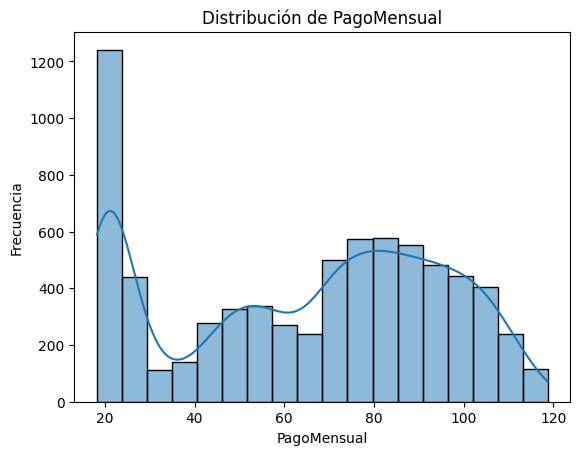

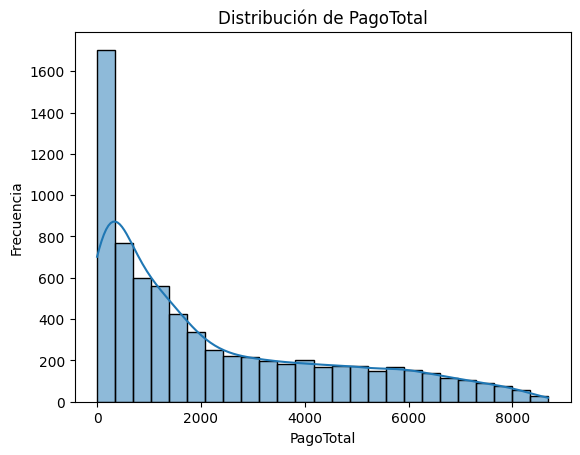

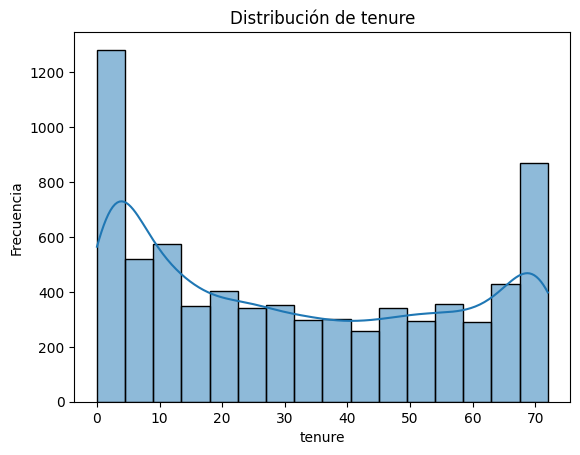

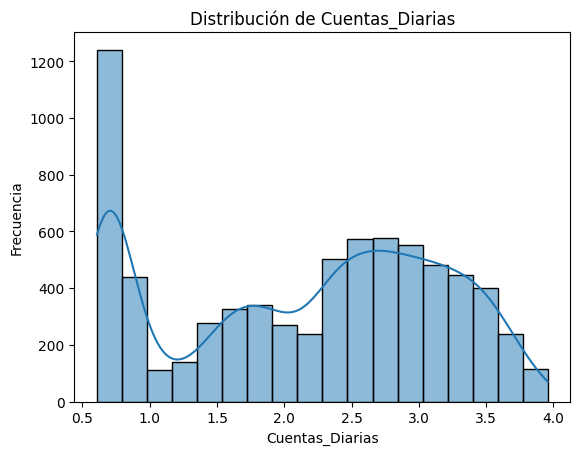

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in variables_clave:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

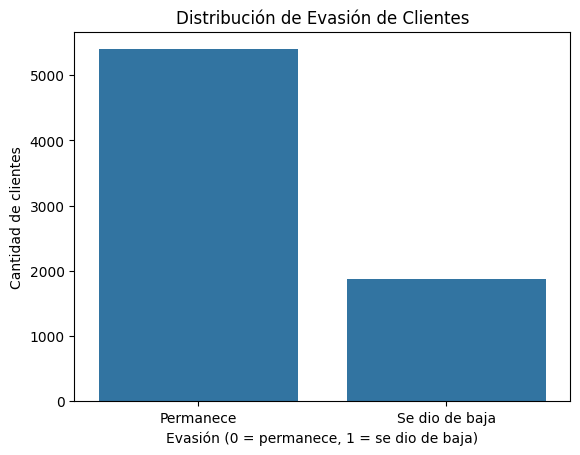

In [54]:
#Gráfico de barras: cantidad de clientes con y sin evasión
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Evasion')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Evasión (0 = permanece, 1 = se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['Permanece', 'Se dio de baja'])
plt.show()

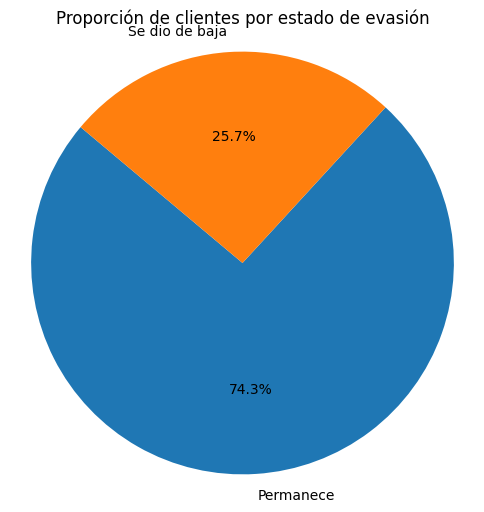

In [55]:
# Gráfico de pastel: proporción porcentual
# Conteo de evasión
evasión_valores = df['Evasion'].value_counts()
etiquetas = ['Permanece', 'Se dio de baja']

plt.figure(figsize=(6, 6))
plt.pie(evasión_valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de clientes por estado de evasión')
plt.axis('equal')
plt.show()

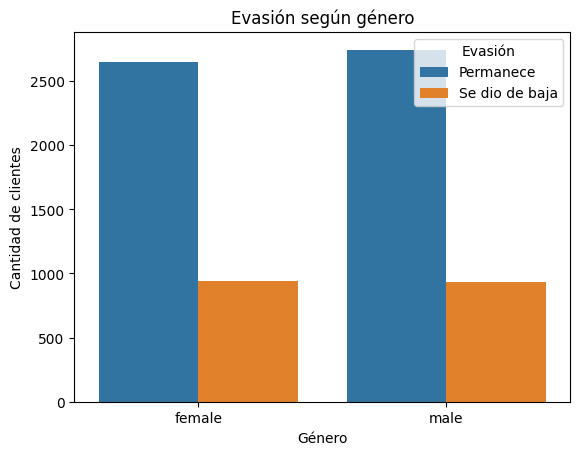

In [56]:
# Evación de género
sns.countplot(data=df, x='gender', hue='Evasion')
plt.title('Evasión según género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasión', labels=['Permanece', 'Se dio de baja'])
plt.show()

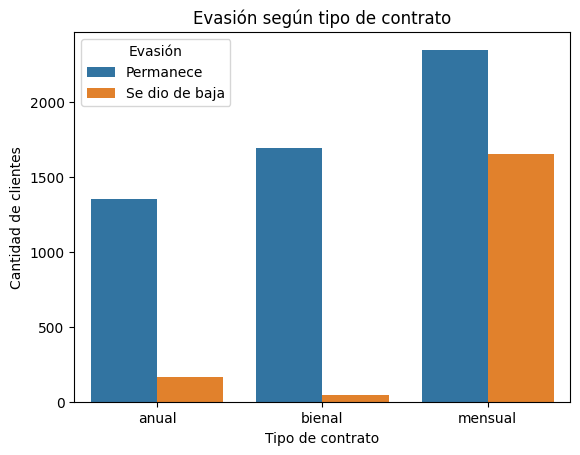

In [57]:
#Evasión por tipo de contrato
sns.countplot(data=df, x='TipoContrato', hue='Evasion')
plt.title('Evasión según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasión', labels=['Permanece', 'Se dio de baja'])
plt.show()

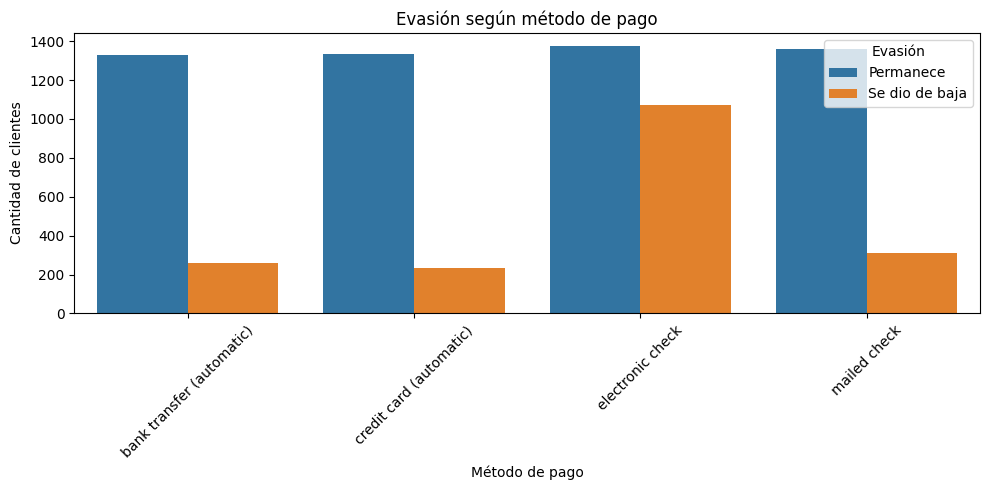

In [58]:
# Evasión por método de pago
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='MetodoPago', hue='Evasion')
plt.title('Evasión según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Evasión', labels=['Permanece', 'Se dio de baja'])
plt.tight_layout()
plt.show()

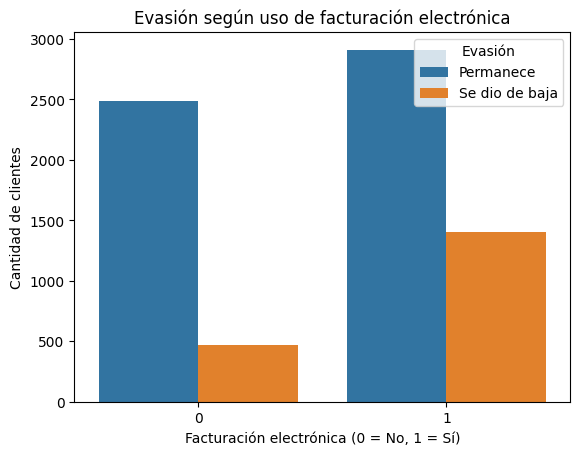

In [59]:
# Evasión por uso de facturación electrónica
sns.countplot(data=df, x='FacturacionElectronica', hue='Evasion')
plt.title('Evasión según uso de facturación electrónica')
plt.xlabel('Facturación electrónica (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Evasión', labels=['Permanece', 'Se dio de baja'])
plt.show()

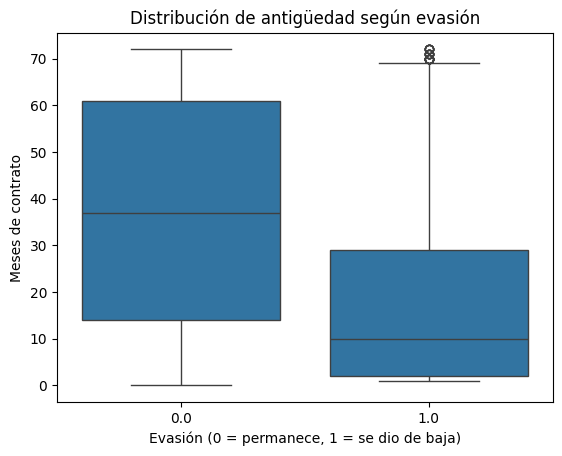

In [60]:
# Tiempo de contrato
sns.boxplot(data=df, x='Evasion', y='tenure')
plt.title('Distribución de antigüedad según evasión')
plt.xlabel('Evasión (0 = permanece, 1 = se dio de baja)')
plt.ylabel('Meses de contrato')
plt.show()

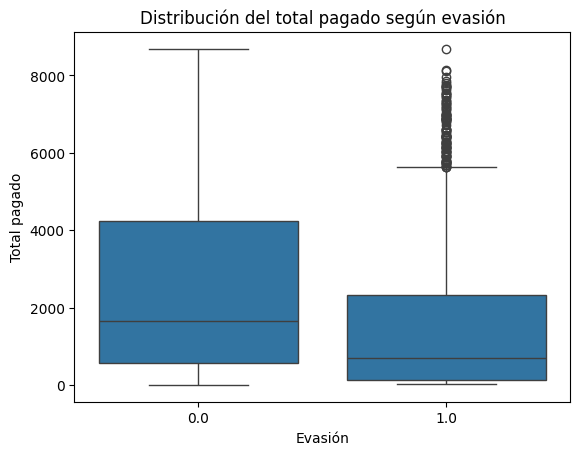

In [61]:
# Total gastado
sns.boxplot(data=df, x='Evasion', y='PagoTotal')
plt.title('Distribución del total pagado según evasión')
plt.xlabel('Evasión')
plt.ylabel('Total pagado')
plt.show()

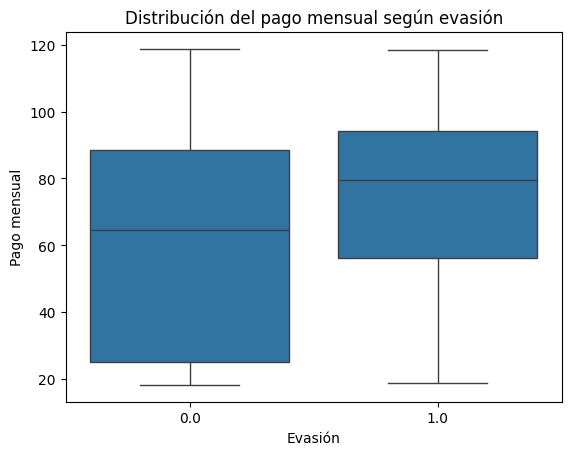

In [62]:
# Pago mensual
sns.boxplot(data=df, x='Evasion', y='PagoMensual')
plt.title('Distribución del pago mensual según evasión')
plt.xlabel('Evasión')
plt.ylabel('Pago mensual')
plt.show()

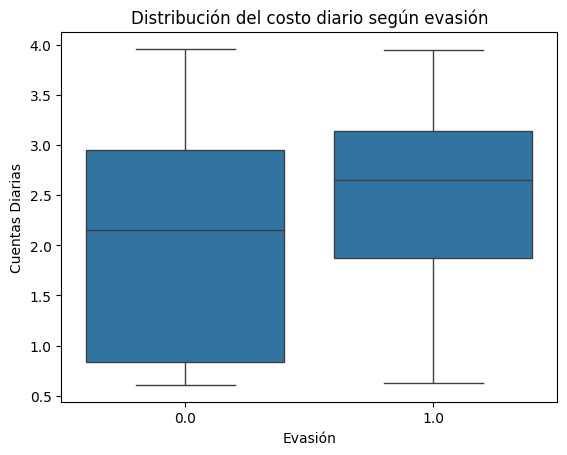

In [63]:
# Cuentas diarias
sns.boxplot(data=df, x='Evasion', y='Cuentas_Diarias')
plt.title('Distribución del costo diario según evasión')
plt.xlabel('Evasión')
plt.ylabel('Cuentas Diarias')
plt.show()

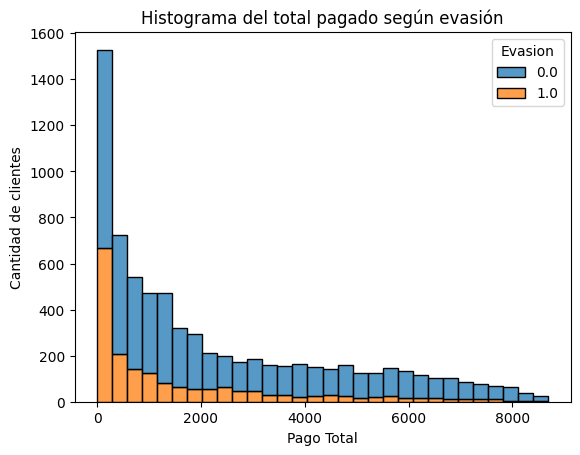

In [64]:
# Histograma segmentado por evasión
sns.histplot(data=df, x='PagoTotal', hue='Evasion', multiple='stack', bins=30)
plt.title('Histograma del total pagado según evasión')
plt.xlabel('Pago Total')
plt.ylabel('Cantidad de clientes')
plt.show()

# Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

---

## Introducción

La empresa **Telecom X** enfrenta una alta tasa de evasión de clientes (Churn), lo cual representa una amenaza significativa para sus ingresos recurrentes. Con el objetivo de comprender mejor los factores que impulsan la cancelación del servicio, se ha desarrollado un análisis exploratorio de datos a partir de un conjunto de información de clientes, suscripciones y comportamiento de facturación.

Este informe resume el proceso de importación, limpieza, análisis y extracción de insights clave que pueden orientar futuras decisiones estratégicas.

---

## Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- **Importación de datos** desde una fuente JSON externa alojada en GitHub.
- **Conversión de columnas anidadas** (`customer`, `phone`, `internet`, `account`) en columnas planas mediante `json_normalize`.
- **Estandarización de valores categóricos**: normalización de texto (`str.lower()`, `strip()`), reemplazo de valores inconsistentes y conversión de "sí"/"no" a valores binarios (1/0).
- **Conversión de tipos de datos**: fechas normalizadas, totales convertidos a `float64`, y campos categóricos codificados como `category`.
- **Creación de nueva columna** `Cuentas_Diarias` para estimar el gasto diario en base al pago mensual.
- **Eliminación o imputación de valores nulos**, especialmente en `account_Charges.Total`.

---

## Análisis Exploratorio de Datos (EDA)

### Distribución general de evasión

Se observó que una proporción importante de clientes se dio de baja:

- **Distribución por clase**:
  - Permanece: ~73%
  - Se da de baja: ~27%

Visualizaciones:  
📈 Gráfico de barras y pastel que confirman un **desbalance de clases** a considerar en futuros modelos.

---

### Evasión por variables categóricas

Se analizaron variables como:

- **Tipo de contrato**: clientes con contrato **mensual** muestran una tasa de evasión mucho más alta que los de contrato anual o bienal.
- **Método de pago**: usuarios que pagan con cheque o manualmente tienen mayor tasa de evasión.
- **Facturación electrónica**: también se asocia con una ligera mayor evasión.
- **Género**: no se observaron diferencias relevantes por género.

Visualizaciones: gráficos de barras segmentados por `Evasion`.

---

### Evasión por variables numéricas

Se analizaron variables como `tenure`, `PagoTotal`, `PagoMensual`, `Cuentas_Diarias`:

- Clientes que **se fueron** suelen tener:
  - **Menor antigüedad** (`tenure`).
  - **Menor total pagado** (`PagoTotal`), indicando salidas tempranas.
  - **Ligeramente mayor pago mensual**, lo que podría generar insatisfacción.
  
Visualizaciones: boxplots y histogramas segmentados por `Evasion`.

---

## Conclusiones e Insights

- **La evasión está concentrada en clientes con contrato mensual**, menor antigüedad y pagos manuales.
- **El gasto mensual alto**, en algunos casos, puede correlacionar con evasión, lo que sugiere que la percepción de precio podría ser un factor.
- **Clientes que se retiran temprano no generan alto valor**, por lo tanto, enfocarse en retención temprana es clave.

---

## Recomendaciones Estratégicas

Implementar campañas de retención dirigidas a:
- Clientes nuevos en los **primeros meses del contrato**.
- Usuarios con **contratos mensuales**, incentivando migración a contratos anuales.

Ofrecer beneficios o descuentos para:
- Clientes que usen **pagos automáticos** o electrónicos.
- Clientes con pagos mensuales elevados como forma de fidelización.

Diseñar modelos predictivos:
- Entrenar modelos con estas variables para **predecir evasión futura** y aplicar acciones preventivas.

---

**Fin del informe** – elaborado por el equipo de análisis de datos de Telecom X.

#¡Extra! Análisis de correlación entre variables

In [65]:
# Ver correlación entre variables numéricas
# Calcular matriz de correlación
correlaciones = df.corr(numeric_only=True)

# Mostrar correlación con la variable "Evasion"
print(correlaciones['Evasion'].sort_values(ascending=False))

Evasion                   1.000000
Cuentas_Diarias           0.189866
PagoMensual               0.189866
FacturacionElectronica    0.186666
SeniorCitizen             0.146733
TienePareja              -0.148546
TieneDependientes        -0.161384
PagoTotal                -0.193345
tenure                   -0.344079
Name: Evasion, dtype: float64


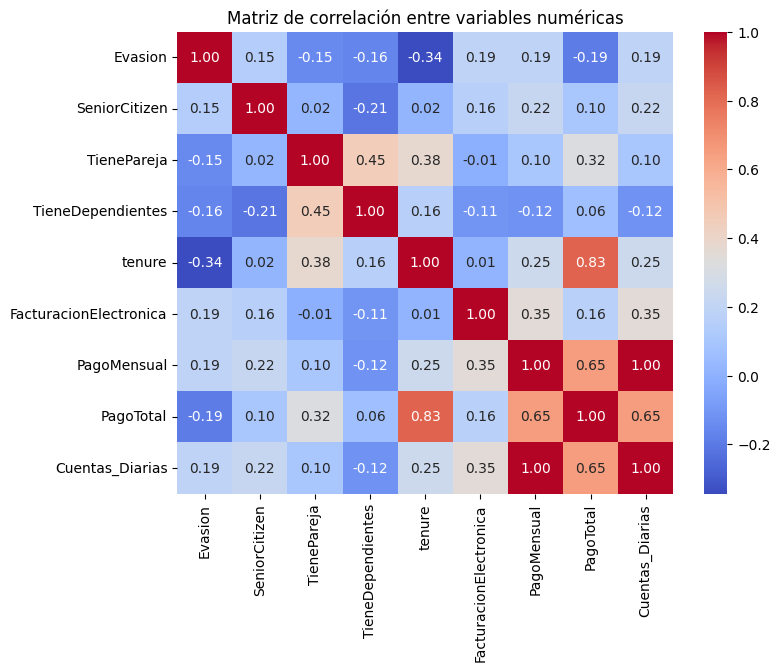

In [66]:
# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

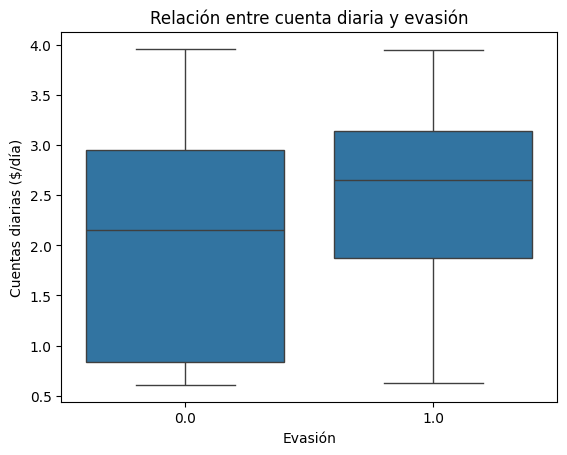

In [67]:
#Gráfico de dispersión: Cuentas_Diarias vs Evasión
sns.boxplot(data=df, x='Evasion', y='Cuentas_Diarias')
plt.title('Relación entre cuenta diaria y evasión')
plt.xlabel('Evasión')
plt.ylabel('Cuentas diarias ($/día)')
plt.show()

# Insight final sugerido
## Mayor evasión se concentra en clientes con menos servicios contratados.

## Existe una correlación negativa entre tenure y Evasion, lo cual sugiere que a mayor antigüedad, menor probabilidad de cancelación.

## La cuenta diaria (Cuentas_Diarias) tiene una ligera correlación positiva con la evasión, indicando que clientes con mayor gasto diario pueden estar más propensos a cancelar